In [1]:
import tweepy
import csv #Import csv

with open('../credentials.txt', 'r') as credentials:
    credentials.readline()
    api_key = credentials.readline().rstrip()
    api_key_secret = credentials.readline().rstrip()
    credentials.readline()
    access_token = credentials.readline().rstrip()
    access_token_secret = credentials.readline().rstrip()

In [2]:
auth = tweepy.auth.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [3]:
# Open/create a file to append data to
csvFile = open('../dataset/prova.csv', 'a', encoding="UTF-8")

#Use csv writer
csvWriter = csv.writer(csvFile)

tweets = []
ratios = []

for tweet in tweepy.Cursor(api.search,
                           q = "from:deliciousmag AND -filter:retweets AND -filter:replies",
                           until='2020-01-28',
                           tweet_mode='extended').items():

    tweets.append(tweet)

    if tweet.user.followers_count == 0:
        continue

    ratio = (tweet.retweet_count) / tweet.user.followers_count
    ratios.append(ratio)

    # Write a row to the CSV file. I use encode UTF-8
    csvWriter.writerow([tweet.user.screen_name, tweet.created_at, tweet.full_text,tweet.retweet_count, ratio])
csvFile.close()

print(ratios)

[2.0117000474761212e-05, 3.2187200759617937e-05, 2.4140400569713452e-05, 3.2187200759617937e-05, 4.0234000949522424e-05, 4.0234000949522424e-05, 1.6093600379808968e-05, 5.230420123437915e-05, 4.0234000949522424e-05, 2.0117000474761212e-05, 3.621060085457018e-05, 3.2187200759617937e-05, 3.2187200759617937e-05, 3.621060085457018e-05, 4.8280801139426905e-05, 4.8280801139426905e-05, 8.046800189904484e-06, 2.0117000474761212e-05, 1.6093600379808968e-05, 2.4140400569713452e-05, 2.4140400569713452e-05, 1.2070200284856726e-05, 2.0117000474761212e-05, 2.8163800664665696e-05, 8.046800189904484e-06, 1.2070200284856726e-05, 6.0351001424283636e-05, 1.6093600379808968e-05, 6.0351001424283636e-05, 1.6093600379808968e-05, 1.6093600379808968e-05, 1.2070200284856726e-05, 1.2070200284856726e-05, 2.0117000474761212e-05, 3.2187200759617937e-05, 4.0234000949522424e-05, 3.2187200759617937e-05, 2.0117000474761212e-05, 1.2070200284856726e-05, 1.6093600379808968e-05, 3.2187200759617937e-05, 2.0117000474761212e-

In [4]:
len(tweets)

81

In [5]:
date = []
retweet_count = []

for tweet in tweets:
    print(tweet.created_at, tweet.retweet_count)
    date.append(tweet.created_at)
    retweet_count.append(tweet.retweet_count)
    

2020-01-27 18:00:00 5
2020-01-27 17:00:00 8
2020-01-27 16:00:00 6
2020-01-27 15:00:00 8
2020-01-27 14:00:01 10
2020-01-27 13:00:00 10
2020-01-27 12:00:00 4
2020-01-27 11:00:00 13
2020-01-27 10:00:00 10
2020-01-27 09:00:01 5
2020-01-27 08:00:00 9
2020-01-26 18:00:01 8
2020-01-26 17:00:00 8
2020-01-26 16:00:00 9
2020-01-26 15:00:00 12
2020-01-26 14:00:00 12
2020-01-26 13:00:00 2
2020-01-26 12:00:00 5
2020-01-26 11:00:00 4
2020-01-26 10:00:00 6
2020-01-26 09:00:00 6
2020-01-26 08:00:00 3
2020-01-25 18:00:00 5
2020-01-25 17:00:00 7
2020-01-25 16:00:01 2
2020-01-25 15:00:00 3
2020-01-25 14:00:01 15
2020-01-25 13:25:00 4
2020-01-25 13:00:00 15
2020-01-25 12:00:00 4
2020-01-25 11:00:01 4
2020-01-25 10:00:01 3
2020-01-25 09:00:00 3
2020-01-25 08:00:00 5
2020-01-24 18:00:00 8
2020-01-24 17:00:01 10
2020-01-24 16:00:01 8
2020-01-24 15:34:01 5
2020-01-24 15:00:01 3
2020-01-24 14:00:00 4
2020-01-24 13:00:00 8
2020-01-24 12:00:01 5
2020-01-24 11:00:00 6
2020-01-24 10:00:00 16
2020-01-24 09:00:00 7


In [6]:
for index, tweet in enumerate(tweets):
    print(tweet.retweet_count)

5
8
6
8
10
10
4
13
10
5
9
8
8
9
12
12
2
5
4
6
6
3
5
7
2
3
15
4
15
4
4
3
3
5
8
10
8
5
3
4
8
5
6
16
7
7
6
3
6
3
5
4
9
1
2
8
31
6
7
7
0
3
2
11
10
2
2
4
7
4
3
8
14
4
10
5
5
11
1
11
4


In [7]:
%matplotlib inline

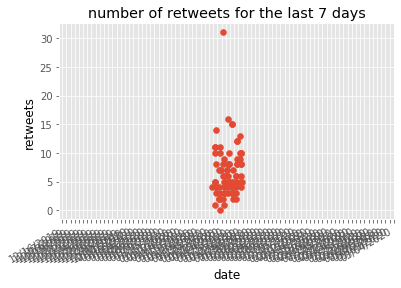

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.style.use('ggplot')
plt.xlabel('date', color='black')
plt.ylabel('retweets', color='black')
plt.title('number of retweets for the last 7 days')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.scatter(date,retweet_count)
plt.gcf().autofmt_xdate()

In [9]:
import numpy
range = numpy.arange(1, len(tweets)+1, 1)

<BarContainer object of 81 artists>

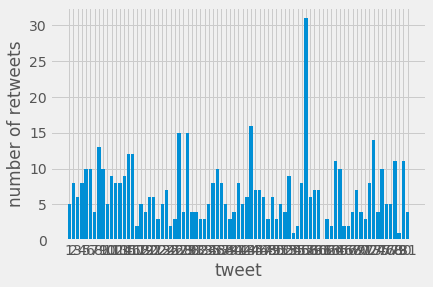

In [10]:
plt.style.use('fivethirtyeight')
plt.xlabel('tweet')
plt.ylabel('number of retweets')
plt.xticks(range)
plt.bar(range, retweet_count)

In [11]:
import pandas as pd

df = pd.read_csv("../dataset/raw_dataset.csv")
df.tail()

,screen_name,date,text,retweet_count,ratio
688,CCulinaire,2020-01-21 17:00:01,Gâteau au yaourt aux pommes extra moelleux. Si...,24,0.014002
689,CCulinaire,2020-01-21 15:00:01,"#Sablés fondants à la #confiture. Faciles, rap...",23,0.013419
690,CCulinaire,2020-01-21 13:00:00,Gâteaux fondants à la confiture - Kroki\n#bisc...,9,0.005251
691,CCulinaire,2020-01-21 08:00:00,Riz au lait caramel au beurre salé. Ultra crém...,8,0.004667
692,CCulinaire,2020-01-20 20:00:00,"#Flan coco, simple et délicieux.\n#cuisine #no...",11,0.006418


In [13]:
names = df.screen_name.unique()
names

array(['OriettasRecipes', 'Cucina_Italiana', 'CookGlobal',
       'indianclaypot', 'misspickledplum', 'chupchupchup', 'Living_Lou',
       'KitchenSanc2ary', 'RecetteFacileFR', 'CCulinaire'], dtype=object)

In [18]:
for name in names:
    print(name)
    count = 0
    for index, row in df[df.screen_name == name].iterrows():
        count += 1
    print(count)

OriettasRecipes
24
Cucina_Italiana
231
CookGlobal
94
indianclaypot
7
misspickledplum
12
chupchupchup
47
Living_Lou
119
KitchenSanc2ary
91
RecetteFacileFR
29
CCulinaire
39
